<a href="https://colab.research.google.com/github/UmaMishra/Big-mart-sales-predictor/blob/main/Big_mart_sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [ ]:
## load data
train=pd.read_csv("/content/big_mart(training).csv")
test=pd.read_csv("/content/big_mart(testing).csv")
final_test=pd.read_csv("/content/big_mart(testing).csv")
sample_file=pd.read_csv("/content/sample.csv")

train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.Outlet_Size.head()


0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [ ]:

train.Item_Visibility.fillna(test.Item_Visibility.mean(),inplace=True)
train.Item_Visibility.isnull().sum()

0

In [ ]:
## This function is very important because it tell about the feature that has high correlation 
## by using this function, we can drop the that particular feature which has greater correlation than the given or mention threshold correlation
## value
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i,j]) > threshold):
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_feature=correlation(train,0.8)
len(set(corr_feature))

In [ ]:
print(corr_feature)

set()


In [ ]:
train.drop(corr_feature,axis=1,inplace=True)
test.drop(corr_feature,axis=1,inplace=True)

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.isna().sum() 
test.isnull().sum()
test.Item_Visibility=final_test.Item_Visibility


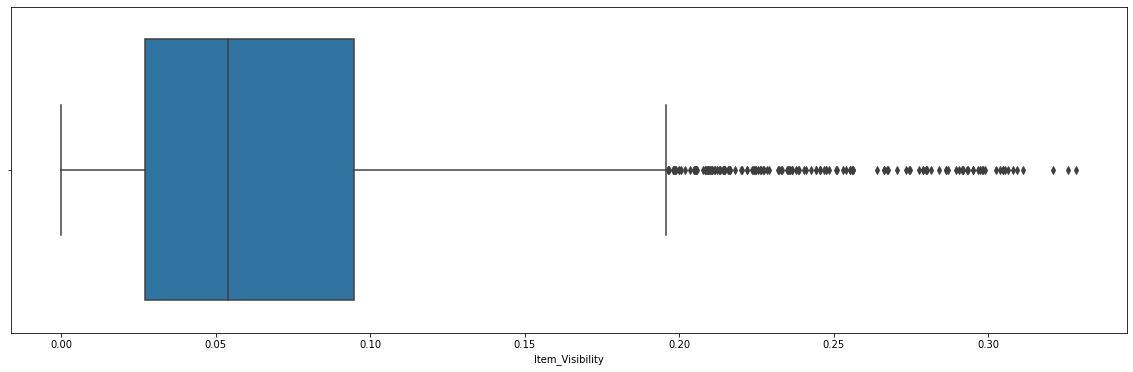

In [ ]:
## 4.check outliers for training dataset and testing datasets
plt.figure(figsize=(20,6))
sns.boxplot(x='Item_Visibility',data=train)

In [ ]:
median = train.loc[train['Item_Visibility']<0.186, 'Item_Visibility'].median()
train["Item_Visibility"]= np.where(train["Item_Visibility"] >0.186, median,train['Item_Visibility'])


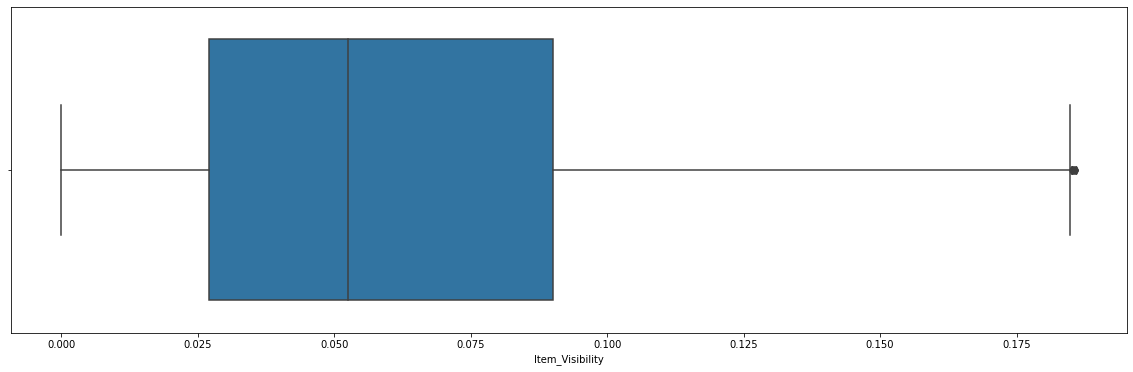

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Item_Visibility',data=train)

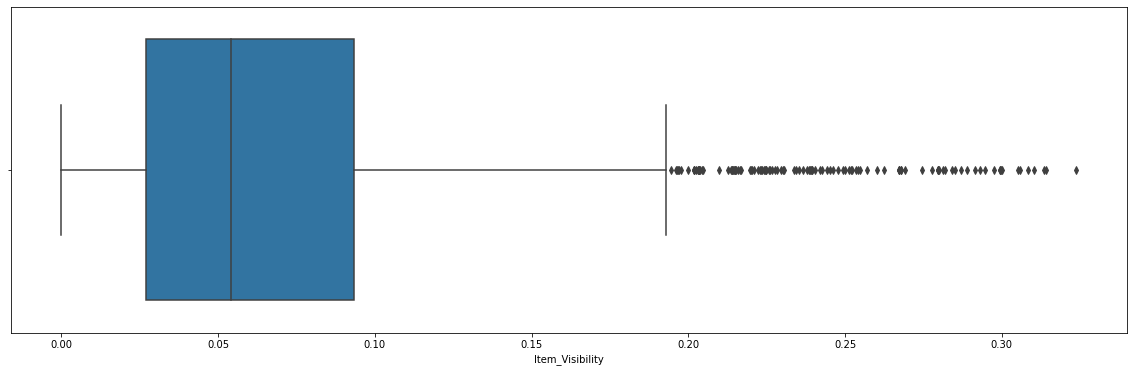

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Item_Visibility',data=test)

In [ ]:
median = test.loc[train['Item_Visibility']<0.178, 'Item_Visibility'].median()
test["Item_Visibility"] = np.where(test["Item_Visibility"] >0.178, median,test['Item_Visibility'])

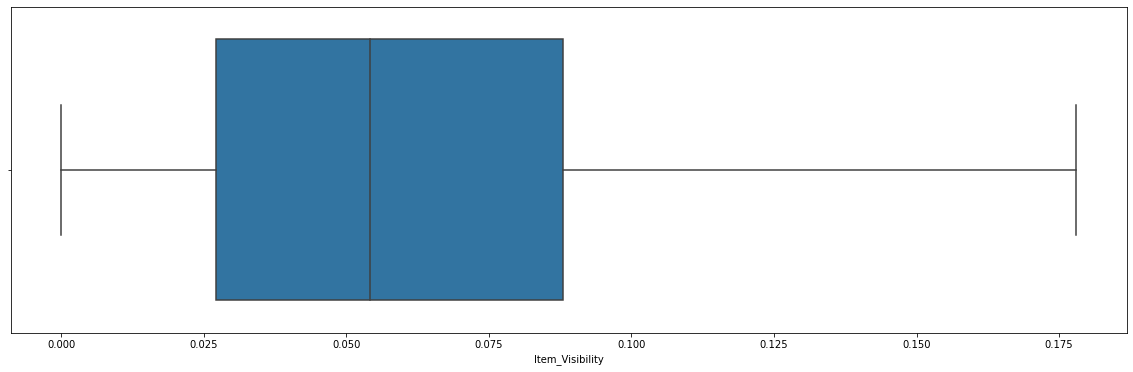

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Item_Visibility',data=test)

In [ ]:
## 3. check missing value if present then fill it
print(train.Item_Weight.isnull().sum())
print(test.Item_Weight.isnull().sum())


1463
976


In [ ]:
train["Item_Weight"] = train["Item_Weight"].fillna(train.Item_Weight.mean())
test["Item_Weight"] = test["Item_Weight"].fillna(test.Item_Weight.mean())

print(train.Item_Weight.isnull().sum())
train.dtypes
test.Outlet_Size.fillna("new_category",inplace=True)
train.Outlet_Size.fillna("new_category",inplace=True)
print(train.Item_Weight.isnull().sum())

0
0


In [ ]:
train=train.drop('Item_Identifier',axis=1)
train=train.drop('Outlet_Identifier',axis=1)
test=test.drop('Item_Identifier',axis=1)
test=test.drop('Outlet_Identifier',axis=1)


In [ ]:
train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [ ]:
x=train.drop('Item_Outlet_Sales',axis=1)
y=train.Item_Outlet_Sales
print(train['Item_Fat_Content'].unique())
print(train['Item_Type'].unique())
print(train['Outlet_Size'].unique())
print(train['Outlet_Location_Type'].unique())
print(train['Outlet_Type'].unique())
train.Outlet_Size.fillna('New_Category',inplace=True)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'new_category' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['Outlet_Size']=label_encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Type']=label_encoder.fit_transform(train['Outlet_Type'])
train['Item_Fat_Content']=label_encoder.fit_transform(train['Item_Fat_Content'])
train['Outlet_Location_Type']=label_encoder.fit_transform(train['Outlet_Location_Type'])
train.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:

test.Outlet_Size

0             Medium
1       new_category
2       new_category
3       new_category
4             Medium
            ...     
5676           Small
5677          Medium
5678    new_category
5679    new_category
5680    new_category
Name: Outlet_Size, Length: 5681, dtype: object

In [ ]:
test['Outlet_Size']=label_encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Type']=label_encoder.fit_transform(test['Outlet_Type'])
test['Item_Fat_Content']=label_encoder.fit_transform(test['Item_Fat_Content'])
test['Outlet_Location_Type']=label_encoder.fit_transform(test['Outlet_Location_Type'])
test.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)
x=train.drop('Item_Outlet_Sales',axis=1)
y=train.Item_Outlet_Sales
test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods'],
      dtype='object')

###Now,implement XGBoost model


In [ ]:
import xgboost
model = xgboost.XGBRegressor()

In [ ]:
model.fit(x,y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
y_pred=model.predict(test)
print(y_pred)
#now for trial purpose

In [ ]:
from sklearn import metrics

In [ ]:
model.score(x_test,y_test)


In [ ]:
submit=pd.read_csv("/content/sample.csv")
submit.Outlet_Identifier=final_test.Outlet_Identifier
submit.head(2)

In [ ]:
submit.Item_Identifier=final_test.Item_Identifier
submit.Item_Outlet_Sales=y_pred
submit[submit.Item_Outlet_Sales < 0]=0

In [ ]:
pd.DataFrame(submit,columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv("/content/sample.csv")
submit.head
